## Trying to set up mongo DB to put two datasets into their own collections

In [4]:
##Dependencies
import pandas as pd
import pymongo 
from pymongo import MongoClient
from matplotlib import pyplot as plt

In [5]:
##Import beer data
beer_csv = pd.read_csv("..\cleaned_data\mlb_beer_cleaned.csv")
beer_csv.head()

,Unnamed: 0,year,team,city,price,size,price_per_oz
0,0,2013,Arizona Diamondbacks,Arizona,4.00,14,0.29
1,1,2013,Atlanta Braves,Atlanta,7.25,16,0.45
2,2,2013,Baltimore Orioles,Baltimore,6.75,18,0.38
3,3,2013,Boston Red Sox,Boston,7.25,12,0.60
4,4,2013,Chicago Cubs,Chicago,7.25,16,0.45


In [6]:
##Convert beer data to dict
beer_dict = beer_csv.to_dict('records')
beer_dict[0]

{'Unnamed: 0': 0,
 'year': 2013,
 'team': 'Arizona Diamondbacks',
 'city': 'Arizona',
 'price': 4.0,
 'size': 14,
 'price_per_oz': 0.29}

In [7]:
##Set up client
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.mlb

In [8]:
##Insert beer dictionary into "beer" collection
db.beer.insert_many(beer_dict)

In [9]:
#Delete test doc
db.beer.delete_one({'test':'beer'})

In [10]:
#Confirm deletion of test doc
beer = db.beer.find()
for i in beer:
    print(i)

{'_id': ObjectId('5f57b3596da87065af1b3c42'), 'Unnamed: 0': 0, 'year': 2013, 'team': 'Arizona Diamondbacks', 'city': 'Arizona', 'price': 4.0, 'size': 14, 'price_per_oz': 0.29}
{'_id': ObjectId('5f57b3596da87065af1b3c43'), 'Unnamed: 0': 1, 'year': 2013, 'team': 'Atlanta Braves', 'city': 'Atlanta', 'price': 7.25, 'size': 16, 'price_per_oz': 0.45}
{'_id': ObjectId('5f57b3596da87065af1b3c44'), 'Unnamed: 0': 2, 'year': 2013, 'team': 'Baltimore Orioles', 'city': 'Baltimore', 'price': 6.75, 'size': 18, 'price_per_oz': 0.38}
{'_id': ObjectId('5f57b3596da87065af1b3c45'), 'Unnamed: 0': 3, 'year': 2013, 'team': 'Boston Red Sox', 'city': 'Boston', 'price': 7.25, 'size': 12, 'price_per_oz': 0.6}
{'_id': ObjectId('5f57b3596da87065af1b3c46'), 'Unnamed: 0': 4, 'year': 2013, 'team': 'Chicago Cubs', 'city': 'Chicago', 'price': 7.25, 'size': 16, 'price_per_oz': 0.45}
{'_id': ObjectId('5f57b3596da87065af1b3c47'), 'Unnamed: 0': 5, 'year': 2013, 'team': 'Chicago White Sox', 'city': 'Chicago', 'price': 6.5, 

In [11]:
##Bring in player stats doc so it fits w/beer but in a separate collection
api_stats = pd.read_csv("..\cleaned_data\stats.csv")
api_stats.head()

,Player ID,first_name,last_name,team,hits,avg,homeruns,atbats,obp,stolenbases,rbi
0,547989,Jose,Abreu,Chicago White Sox,132,.265,22,499,.325,2,78
1,660670,Ronald,Acuna,Atlanta Braves,127,.293,26,433,.366,16,64
2,592094,Jason,Adam,Chicago Cubs,0,.---,0,0,.---,0,0
3,642715,Willy,Adames,Tampa Bay Rays,80,.278,10,288,.348,6,34
4,613534,Austin,Adams,San Diego Padres,0,.---,0,0,.---,0,0


In [12]:
#Fill NAs with 0s
api_stats = api_stats.fillna(value = 0 )
api_stats.head()

,Player ID,first_name,last_name,team,hits,avg,homeruns,atbats,obp,stolenbases,rbi
0,547989,Jose,Abreu,Chicago White Sox,132,.265,22,499,.325,2,78
1,660670,Ronald,Acuna,Atlanta Braves,127,.293,26,433,.366,16,64
2,592094,Jason,Adam,Chicago Cubs,0,.---,0,0,.---,0,0
3,642715,Willy,Adames,Tampa Bay Rays,80,.278,10,288,.348,6,34
4,613534,Austin,Adams,San Diego Padres,0,.---,0,0,.---,0,0


In [13]:
api_stats.isnull().sum()

Player ID      0
first_name     0
last_name      0
team           0
hits           0
avg            0
homeruns       0
atbats         0
obp            0
stolenbases    0
rbi            0
dtype: int64

In [14]:
##Convert api data to dict
api_dict = api_stats.to_dict('records')
api_dict[0]


{'Player ID': 547989,
 'first_name': 'Jose',
 'last_name': 'Abreu',
 'team': 'Chicago White Sox',
 'hits': 132,
 'avg': '.265',
 'homeruns': 22,
 'atbats': 499,
 'obp': '.325',
 'stolenbases': 2,
 'rbi': 78}

In [15]:
##Insert api dictionary into "api_stats" collection
db.api_stats.insert_many(api_dict)

In [16]:
#Confirm insertion of API data into api_stats db
api = db.api_stats.find()
for i in api:
    print(i)

{'_id': ObjectId('5f57b84a6da87065af1b3cde'), 'Player ID': 547989, 'first_name': 'Jose', 'last_name': 'Abreu', 'team': 'Chicago White Sox', 'hits': 132.0, 'avg': '.265', 'homeruns': 22.0, 'atbats': 499.0, 'obp': '.325', 'stolenbases': 2.0, 'rbi': 78.0}
{'_id': ObjectId('5f57b84a6da87065af1b3cdf'), 'Player ID': 660670, 'first_name': 'Ronald', 'last_name': 'Acuna', 'team': 'Atlanta Braves', 'hits': 127.0, 'avg': '.293', 'homeruns': 26.0, 'atbats': 433.0, 'obp': '.366', 'stolenbases': 16.0, 'rbi': 64.0}
{'_id': ObjectId('5f57b84a6da87065af1b3ce0'), 'Player ID': 592094, 'first_name': 'Jason', 'last_name': 'Adam', 'team': 'Chicago Cubs', 'hits': 0.0, 'avg': '.---', 'homeruns': 0.0, 'atbats': 0.0, 'obp': '.---', 'stolenbases': 0.0, 'rbi': 0.0}
{'_id': ObjectId('5f57b84a6da87065af1b3ce1'), 'Player ID': 642715, 'first_name': 'Willy', 'last_name': 'Adames', 'team': 'Tampa Bay Rays', 'hits': 80.0, 'avg': '.278', 'homeruns': 10.0, 'atbats': 288.0, 'obp': '.348', 'stolenbases': 6.0, 'rbi': 34.0}
{

{'_id': ObjectId('5f5ac8b30a6e7b9b07974b54'), 'Player ID': 573064, 'first_name': 'Vidal', 'last_name': 'Nuno', 'team': 'Toros de Tijuana', 'hits': 2.0, 'avg': '1.000', 'homeruns': 0.0, 'atbats': 2.0, 'obp': '1.000', 'stolenbases': 0.0, 'rbi': 1.0}
{'_id': ObjectId('5f5ac8b30a6e7b9b07974b55'), 'Player ID': 598284, 'first_name': 'Peter', 'last_name': "O'Brien", 'team': 'Atlanta Braves', 'hits': 18.0, 'avg': '.273', 'homeruns': 4.0, 'atbats': 66.0, 'obp': '.338', 'stolenbases': 0.0, 'rbi': 10.0}
{'_id': ObjectId('5f5ac8b30a6e7b9b07974b56'), 'Player ID': 503285, 'first_name': 'Darren', 'last_name': "O'Day", 'team': 'Atlanta Braves', 'hits': 0.0, 'avg': '.---', 'homeruns': 0.0, 'atbats': 0.0, 'obp': '.---', 'stolenbases': 0.0, 'rbi': 0.0}
{'_id': ObjectId('5f5ac8b30a6e7b9b07974b57'), 'Player ID': 622217, 'first_name': 'Chris', 'last_name': "O'Grady", 'team': 'Miami Marlins', 'hits': 0.0, 'avg': '.---', 'homeruns': 0.0, 'atbats': 0.0, 'obp': '.---', 'stolenbases': 0.0, 'rbi': 0.0}
{'_id': Ob

{'_id': ObjectId('5f5adda59f08ab7a8949459b'), 'Player ID': 527043, 'first_name': 'Jefry', 'last_name': 'Marte', 'team': 'Los Angeles Angels', 'hits': 42, 'avg': '.216', 'homeruns': 7, 'atbats': 194, 'obp': '.273', 'stolenbases': 1, 'rbi': 22}
{'_id': ObjectId('5f5adda59f08ab7a8949459c'), 'Player ID': 606466, 'first_name': 'Ketel', 'last_name': 'Marte', 'team': 'Arizona Diamondbacks', 'hits': 135, 'avg': '.260', 'homeruns': 14, 'atbats': 520, 'obp': '.332', 'stolenbases': 6, 'rbi': 59}
{'_id': ObjectId('5f5adda59f08ab7a8949459d'), 'Player ID': 516782, 'first_name': 'Starling', 'last_name': 'Marte', 'team': 'Miami Marlins', 'hits': 155, 'avg': '.277', 'homeruns': 20, 'atbats': 559, 'obp': '.327', 'stolenbases': 33, 'rbi': 72}
{'_id': ObjectId('5f5adda59f08ab7a8949459e'), 'Player ID': 455119, 'first_name': 'Chris', 'last_name': 'Martin', 'team': 'Atlanta Braves', 'hits': 0, 'avg': '.---', 'homeruns': 0, 'atbats': 0, 'obp': '.---', 'stolenbases': 0, 'rbi': 0}
{'_id': ObjectId('5f5adda59f08

In [17]:
scraped_stats = pd.read_csv('../cleaned_data/player_stats.csv')
scraped_stats = scraped_stats.drop(scraped_stats.columns[[0,1]], axis=1,)
scraped_stats

,PLAYER,AB,R,H,HR,RBI,SO,SB,CS,BA
0,Mookie Betts,520,129,180,32,80,91,30,6,0.346
1,J.D. Martinez,569,111,188,43,130,146,6,1,0.330
2,Jeff McNeil,225,35,74,3,19,24,7,1,0.329
3,Christian Yelich,574,118,187,36,110,135,22,4,0.326
4,Jose Altuve,534,84,169,13,61,79,17,4,0.316
...,...,...,...,...,...,...,...,...,...,...
1319,Gary Sanchez,323,51,60,18,53,94,1,0,0.186
1320,Aaron Altherr,243,28,44,8,38,91,3,2,0.181
1321,Dexter Fowler,289,40,52,8,31,75,5,2,0.180
1322,Sandy Leon,265,30,47,5,22,75,1,0,0.177


In [18]:

scraped_stats_dict = scraped_stats.to_dict('records')
# stats_dict
mongo_scraped_stats = []
mongo_scraped_stats = [scraped_stats_dict]
# mongo_stats

In [19]:
# scraped_stats_dict

In [20]:
##L-load into mongo db--commented out for now
## cluster = MongoClient("PUT CONNECTION STRING HERE")
## db = cluster['NAME OF MLB DATABASE']
## collection = db['PUT COLLECTION NAME HERE FOR BEER']
## collection.insert_many(mongo_beer_docs)

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
db = client.mlb

db.scraped_stats.insert_many(scraped_stats_dict)

### Visualizations with data

In [21]:
## Vizualization One: Prices of beers at different stadiums
##Import data from mongo
beer_data = db.beer.find()
beer_df = pd.DataFrame(list(beer_data))
beer_df_grouped = beer_df.groupby(by = 'team').mean()
beer_df_grouped

,Unnamed: 0,year,price,size,price_per_oz
team,,,,,
Arizona Diamondbacks,62.0,2015.2,4.000,14.0,0.290
Atlanta Braves,63.0,2015.2,6.900,15.2,0.450
Baltimore Orioles,64.0,2015.2,6.200,15.6,0.394
Boston Red Sox,65.0,2015.2,7.700,12.0,0.644
Chicago Cubs,66.0,2015.2,7.750,16.8,0.462
Chicago White Sox,67.0,2015.2,6.600,16.0,0.416
Cincinnati Reds,68.0,2015.2,5.600,12.8,0.442
Cleveland Indians,69.0,2015.2,4.200,12.0,0.348
Colorado Rockies,70.0,2015.2,4.800,14.4,0.328


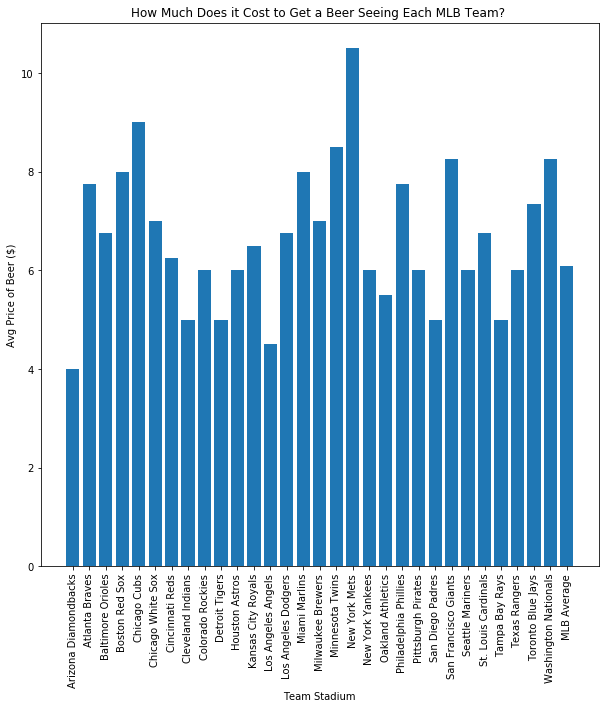

In [23]:
##Graph price of beer vs team
plt.figure(figsize = (10,10))
plt.bar(beer_df['team'], beer_df['price'])
plt.xticks(rotation = 90)
plt.xlabel('Team Stadium') 
plt.ylabel('Avg Price of Beer ($)')
plt.title('How Much Does it Cost to Get a Beer Seeing Each MLB Team? ')
plt.savefig('beercost.png')
plt.show()

In [24]:
##Graph avg hits by team 
hits_data_api = db.api_stats.find()
api_stats = pd.DataFrame(list(hits_data_api))
# api_stats = api_stats.drop(api_stats[api_stats['first_name'] == 0], axis = 1)
api_stats = api_stats.drop_duplicates(subset=['Player ID'], keep='first')

In [3]:
#GROUP BY TEAM
api_stats_grouped = api_stats.groupby(by = 'team').sum()
type(api_stats_grouped)

NameError: name 'api_stats' is not defined

In [27]:
#MERGE WITH BEER ALONG TEAM NAME 
merged_beer_api = beer_df_grouped.merge(api_stats_grouped, how = 'inner', on = 'team')
merged_beer_api

,Unnamed: 0,year,price,size,price_per_oz,Player ID,hits,homeruns,atbats,stolenbases,rbi
team,,,,,,,,,,,
Arizona Diamondbacks,62.0,2015.2,4.000,14.0,0.290,17255899,1152.0,141.0,4652.0,43.0,548.0
Atlanta Braves,63.0,2015.2,6.900,15.2,0.450,26532455,1948.0,266.0,7670.0,102.0,1011.0
Baltimore Orioles,64.0,2015.2,6.200,15.6,0.394,22848423,948.0,116.0,4199.0,33.0,409.0
Boston Red Sox,65.0,2015.2,7.700,12.0,0.644,24521282,1342.0,168.0,5122.0,91.0,712.0
Chicago Cubs,66.0,2015.2,7.750,16.8,0.462,32212043,2194.0,247.0,8619.0,134.0,1086.0
Chicago White Sox,67.0,2015.2,6.600,16.0,0.416,21534749,1457.0,203.0,6197.0,108.0,735.0
Cincinnati Reds,68.0,2015.2,5.600,12.8,0.442,23546273,1456.0,187.0,5701.0,50.0,727.0
Cleveland Indians,69.0,2015.2,4.200,12.0,0.348,18791714,1396.0,221.0,5753.0,149.0,721.0
Colorado Rockies,70.0,2015.2,4.800,14.4,0.328,19617718,1437.0,232.0,5509.0,99.0,798.0


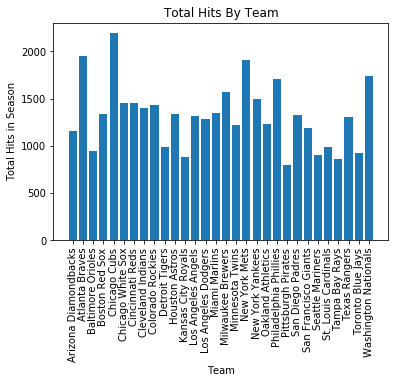

In [28]:
#Graph team v hits
plt.bar(merged_beer_api.index, merged_beer_api.hits)
plt.xticks(rotation = 90)
plt.xlabel('Team')
plt.ylabel('Total Hits in Season')
plt.title('Total Hits By Team')
plt.savefig('total_hits_by_team.png')
plt.show()

In [95]:
api_stats.team.unique()

array(['Chicago White Sox', 'Atlanta Braves', 'Chicago Cubs',
       'Tampa Bay Rays', 'San Diego Padres', 'Kansas City Royals',
       'Minnesota Twins', 'Nashville Sounds', 'Miami Marlins',
       'Arizona Diamondbacks', 'Milwaukee Brewers', 'Baltimore Orioles',
       'Detroit Tigers', 'Los Angeles Dodgers', 'Pittsburgh Pirates',
       'Texas Rangers', 0, 'Colorado Rockies', 'New York Mets',
       'Houston Astros', 'Philadelphia Phillies',
       'New Orleans Baby Cakes', 'Toronto Blue Jays',
       'Los Angeles Angels', 'Oakland Athletics', 'San Francisco Giants',
       'Boston Red Sox', 'New York Yankees', 'Cincinnati Reds',
       'Rochester Red Wings', 'Iowa Cubs', 'St. Louis Cardinals',
       'Chattanooga Lookouts', 'Aberdeen IronBirds', 'Cleveland Indians',
       'El Paso Chihuahuas', 'Acereros del Norte', 'Seattle Mariners',
       'Washington Nationals', 'Memphis Redbirds', 'Syracuse Mets',
       'Tacoma Rainiers', 'Scranton/Wilkes-Barre RailRiders',
       'Sacramento

In [38]:
#Web scraping data
web_scrape = db.scraped_stats.find()
web_data = pd.DataFrame(list(web_scrape))
web_data.head()

,_id,PLAYER,AB,R,H,HR,RBI,SO,SB,CS,BA
0,5f5ac8f80a6e7b9b07974d4f,Mookie Betts,520,129,180,32,80,91,30,6,0.346
1,5f5ac8f80a6e7b9b07974d50,J.D. Martinez,569,111,188,43,130,146,6,1,0.330
2,5f5ac8f80a6e7b9b07974d51,Jeff McNeil,225,35,74,3,19,24,7,1,0.329
3,5f5ac8f80a6e7b9b07974d52,Christian Yelich,574,118,187,36,110,135,22,4,0.326
4,5f5ac8f80a6e7b9b07974d53,Jose Altuve,534,84,169,13,61,79,17,4,0.316
